
# Tarea 04
## Bisección
### Celeste Lascano





 

Antes de realizar los ejercicios, definí una función que verifique que  f(a) y f(b) tengan signos opuestos. Luego se repite: toma el punto medio m, evalua f(m), y sustituye el sub-intervalo que mantiene el cambio de signo. Se detiene cuando el intervalo es más pequeño que la tolerancia o llegamos a maxit. Esta función la voy a utilizar en los ejercicios que requieran usar bisección.

In [15]:

import math

def biseccion(f, a, b, tol=1e-10, maxit=10_000):
   
    fa, fb = f(a), f(b)
    if fa == 0:
        return a, 0, 0
    if fb == 0:
        return b, 0, 0
    if fa*fb > 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos para bisección.")
    
    it = 0
    while it < maxit:
        m = 0.5*(a+b)
        fm = f(m)
        
        if 0.5*(b-a) < tol:
            return m, it, fm
        
        if fm == 0.0:
            return m, it, fm
        
        if fa*fm < 0:
            b, fb = m, fm
        else:
            a, fa = m, fm
        it += 1
    return 0.5*(a+b), it, f(0.5*(a+b))



1\. Use el método de bisección para encontrar soluciones precisas dentro de $10^{-2}$ para $x^3 -7x^2 + 14x - 6 = 0$ en cada intervalo. 

Primero definimos la función del polinomio. Luego aplicamos bisección en cada intervalo con tol = 1e-10.  
Después verificamos que el error sea suficientemente pequeño comparando con la evaluación de f y el tamaño del intervalo final.

In [16]:

def f1(x):
    return x**3 - 7*x**2 + 14*x - 6

intervalos = {
    "(a) [0, 1]": (0.0, 1.0),
    "(b) [1, 3.2]": (1.0, 3.2),
    "(c) [3.2, 4]": (3.2, 4.0)
}

tol = 1e-10
for nombre, (a,b) in intervalos.items():
    try:
        r, it, fr = biseccion(f1, a, b, tol=tol)
        print(f"{nombre}: raíz ≈ {r:.12f}, f(r) ≈ {fr:.3e}, iteraciones = {it}")
    except ValueError as e:
        print(f"{nombre}: {e}")


(a) [0, 1]: raíz ≈ 0.585786437674, f(r) ≈ 3.213e-10, iteraciones = 33
(b) [1, 3.2]: raíz ≈ 2.999999999994, f(r) ≈ 5.812e-12, iteraciones = 34
(c) [3.2, 4]: raíz ≈ 3.414213562291, f(r) ≈ -9.605e-11, iteraciones = 32


2\. Dibuje las gráficas para $𝑦 = 𝑥$ y $𝑦 = sin 𝑥$. 

Primero realizamos una gráfica simple en un rango corto para ver dónde se cruzan.  
Luego observamos visualmente el primer cruce positivo cerca de 0.


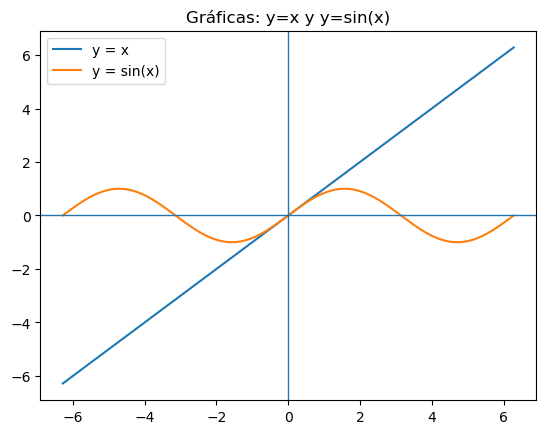

In [17]:

import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-2*np.pi, 2*np.pi, 800)
plt.figure()
plt.plot(xs, xs, label='y = x')
plt.plot(xs, np.sin(xs), label='y = sin(x)')
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)
plt.legend()
plt.title("Gráficas: y=x y y=sin(x)")
plt.show()



b\. Use el método de bisección para encontrar soluciones precisas dentro de $10^{-5}$ para el primer valor positivo
de $x$ con $𝑥 = 2 sin 𝑥$ 


Primero reescribimos como $g(x) = x - 2\sin x = 0$
Luego buscamos un intervalo pequeño cerca de 0 donde haya cambio de signo y aplicamos bisección.


In [18]:

def g2(x):
    return x - 2*math.sin(x)

r2, it2, fr2 = biseccion(g2, 0.0, 2.0, tol=1e-10)
print(f"x ≈ {r2:.12f}, g(x) ≈ {fr2:.3e}, iteraciones = {it2}")


x ≈ 0.000000000000, g(x) ≈ 0.000e+00, iteraciones = 0


3\. Dibuje las gráficas para $y=x$ y $y=tanx$

Primero realizamos una gráfica y evitamos los puntos de discontinuidad de $\tan x$.  
Dibujamos un rango que muestre la primera solución positiva distinta de 0.

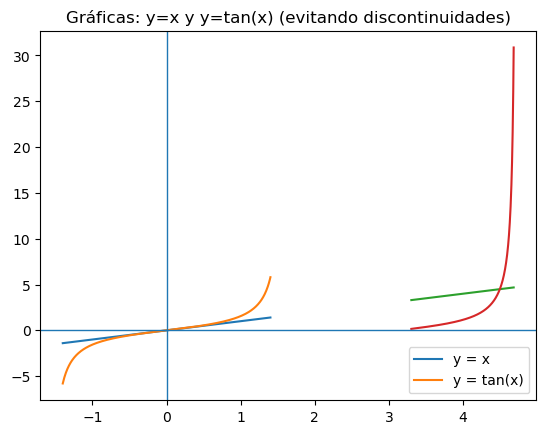

In [19]:

import numpy as np
import matplotlib.pyplot as plt


xs1 = np.linspace(-1.4, 1.4, 400)     
xs2 = np.linspace(3.3, 4.68, 500)       

plt.figure()
plt.plot(xs1, xs1, label='y = x')
plt.plot(xs1, np.tan(xs1), label='y = tan(x)')
plt.plot(xs2, xs2)
plt.plot(xs2, np.tan(xs2))
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)
plt.title("Gráficas: y=x y y=tan(x) (evitando discontinuidades)")
plt.legend()
plt.show()



b\. Use el método de bisección para encontrar una aproximación dentro de $10^{-3}$ para el primer valor positivo
de $𝑥$ con $𝑥 = tan 𝑥$ 


Primero definimos $h(x) = \tan x - x$.  
Luego sustituimos un intervalo que contenga la primera raíz positiva distinta de 0.  
La raíz está antes de $3\pi/2$ (aprox. 4.712...), cerca de 4.49. Usamos $[4.4, 4.6]$.


In [20]:

def h3(x):
    return math.tan(x) - x

r3, it3, fr3 = biseccion(h3, 4.4, 4.6, tol=1e-10)
print(f"x ≈ {r3:.12f}, h(x) ≈ {fr3:.3e}, iteraciones = {it3}")


x ≈ 4.493409457896, h(x) ≈ -2.657e-10, iteraciones = 30



4\. Dibuje las gráficas para $y=x^2 - 1$ y $y=e^{1-x^2}$

Para dibujar la grafica, añadimos al eje $x$ un pequeño desplazamiento de $+0.0001234$ para ilustrar sensibilidad.

Primero realizamos dos curvas simples y luego repetimos con el desplazamiento.


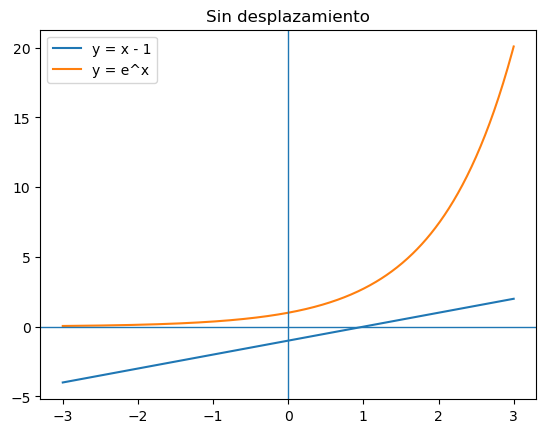

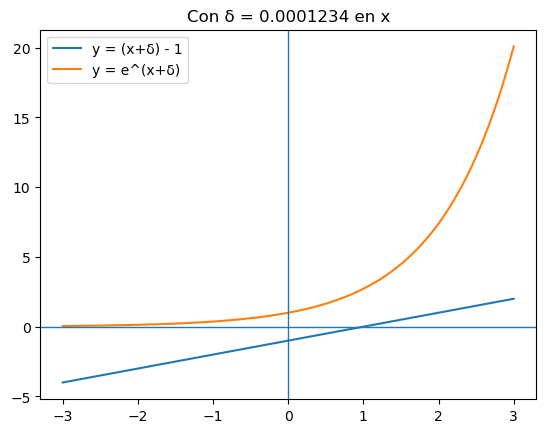

In [21]:

import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(-3, 3, 600)
plt.figure()
plt.plot(xs, xs-1, label='y = x - 1')
plt.plot(xs, np.exp(xs), label='y = e^x')
plt.axhline(0, linewidth=1); plt.axvline(0, linewidth=1)
plt.legend(); plt.title("Sin desplazamiento"); plt.show()

xs2 = xs + 0.0001234
plt.figure()
plt.plot(xs2, xs2-1, label='y = (x+δ) - 1')
plt.plot(xs2, np.exp(xs2), label='y = e^(x+δ)')
plt.axhline(0, linewidth=1); plt.axvline(0, linewidth=1)
plt.legend(); plt.title("Con δ = 0.0001234 en x"); plt.show()


b. Use el método de bisección para encontrar una aproximación dentro de $10^{-3}$ para un valor en [−2, 0] con $x^2 - 1= e^{1-x^2}$


Primero reescribimos como $q(x) = x - 1 - e^x = 0$.  
Luego sustituimos el intervalo \([-2, 0]\) y ejecutamos bisección.


In [31]:

def q4(x):
    return x - 1 - math.exp(-x)

r4, it4, fr4 = biseccion(q4, -2.0, 0.0, tol=1e-10)
print(f"x ≈ {r4:.12f}, q(x) ≈ {fr4:.3e}, iteraciones = {it4}")


ValueError: f(a) y f(b) deben tener signos opuestos para bisección.

Se observa que en el intervalo [-2,0] no encierra ninguna raíz, por tanto el intervalo es incorrecto. 


5\. Sea $f(x) = (x+3)(x+1)\,x\,(x-1)(x-3)$. ¿En qué cero de $f$ converge la bisección cuando se aplica en cada intervalo?

Primero realizamos la función. Luego sustituimos cada intervalo y corremos bisección.  
Finalmente, comparamos la raíz obtenida con los ceros $\{-3,-1,0,1,3\}$.


In [23]:

def f5(x):
    return (x+3)*(x+1)*x*(x-1)*(x-3)

intervalos5 = {
    "(a) [-1.5, 2.5]": (-1.5, 2.5),
    "(b) [-0.5, 2.4]": (-0.5, 2.4),
    "(c) [-0.5, 3]":   (-0.5, 3.0),
    "(d) [-3, -0.5]":  (-3.0, -0.5),
}
zeros = [-3, -1, 0, 1, 3]

def mas_cercano(x, xs):
    return min(xs, key=lambda z: abs(x - z))

for nombre, (a,b) in intervalos5.items():
    try:
        r, it, fr = biseccion(f5, a, b, tol=1e-10)
        z = mas_cercano(r, zeros)
        print(f"{nombre}: converge a ≈ {r:.12f} (cero más cercano: {z}), f(r) ≈ {fr:.1e}")
    except ValueError as e:
        print(f"{nombre}: {e}")


(a) [-1.5, 2.5]: converge a ≈ 1.000000000000 (cero más cercano: 1), f(r) ≈ -0.0e+00
(b) [-0.5, 2.4]: f(a) y f(b) deben tener signos opuestos para bisección.
(c) [-0.5, 3]: converge a ≈ 3.000000000000 (cero más cercano: 3), f(r) ≈ 0.0e+00
(d) [-3, -0.5]: converge a ≈ -3.000000000000 (cero más cercano: -3), f(r) ≈ 0.0e+00


# EJERCICIOS APLICADOS


1\. Un abrevadero de longitud 𝐿 tiene una sección transversal en forma de semicírculo con radio 𝑟. (Consulte la
figura adjunta.) Cuando se llena con agua hasta una distancia ℎ a partir de la parte superior, el volumen 𝑉 de
agua es 

$$V = L[0.5\pi r^2 - r^2 arcsen(\frac{h}{r} - h(r^2 - h^2)^{\frac{1}{2}})] $$

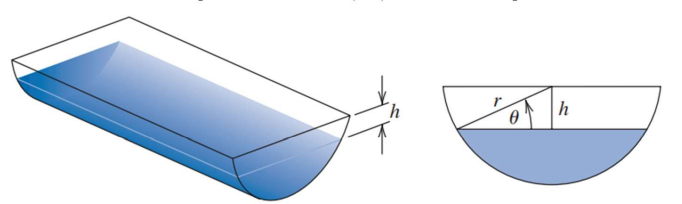

Suponga que $L = 10cm, r= 1cm y V= 12.4 cm^3.$ Encuentre la profundidad del agua en el abrevadero dentro de 0.01 $cm$


Primero realizamos el área del segmento circular de altura $h$ en un círculo de radio $r$:  
$$
A(h) = r^2\arccos\!\left(\frac{r-h}{r}\right) - (r-h)\,\sqrt{2rh - h^2}, \quad 0 \le h \le r.
$$
Luego sustituimos $V = L\cdot A(h)$ y resolvemos $F(h) = L\,A(h) - V = 0$ por bisección en $[0,r]$.


In [ ]:

def area_segmento(h, r):
    if h <= 0: 
        return 0.0
    if h >= r:
        return 0.5*math.pi*r*r  
    return r*r*math.acos((r-h)/r) - (r-h)*math.sqrt(2*r*h - h*h)

def profundidad_por_biseccion(L, r, V, tol=1e-2):
    def F(h):
        return L*area_segmento(h, r) - V
    return biseccion(F, 0.0, r, tol=tol)


L = 10.0  
r = 1.0   
V = 12.4  

h, it_h, Fh = profundidad_por_biseccion(L, r, V, tol=1e-2)
print(f"h ≈ {h:.3f} cm, residuo ≈ {Fh:.3e}, iteraciones = {it_h}")


h ≈ 0.836 cm, residuo ≈ 4.149e-02, iteraciones = 6


## Aplicado 2 — Tiempo de caída con resistencia del aire


2\. Un objeto que cae verticalmente a través del aire está sujeto a una resistencia viscosa, así como a la fuerza
de gravedad. Suponga que un objeto con masa 𝑚 cae desde una altura $s_0$ y que la altura del objeto después
de $𝑡$ segundos es

$$ s(t) = s_{0} - \frac{mg}{k} t + \frac{m^2g}{k^2} (1 - e^{\frac{-kt}{m}}) $$

donde $g = 9.81 \frac{m}{s^2}$ y $k$ representa el coeficiente de la resistencia del aire en $\frac{NS}{m}$. Suponga $s_0 = 300m, m= 0.25 kg y k = 0.1 \frac{Ns}{m}$ Encuentre, dentro de $0.01 segundos$, el tiempo que tarda un cuarto de kg en golpear el piso.


Primero realizamos la fórmula con velocidad inicial cero:
$$
v(t) = v_\infty\!\left(1 - e^{-\frac{k}{m}t}\right), \quad v_\infty = \frac{mg}{k},
$$
$$
s(t) = s_0 - \frac{m g}{k}\,t + \frac{m^2 g}{k^2}\!\left(1 - e^{-\frac{k}{m}t}\right).
$$
Luego sustituimos $s(t)=0$ y resolvemos por bisección en un intervalo amplio.


In [25]:

def s_t(t, s0, m, k, g=9.81):
    return s0 - (m*g/k)*t + (m*m*g)/(k*k) * (1 - math.exp(-(k/m)*t))

def tiempo_impacto(s0, m, k, g=9.81, tol=1e-2):
   
    T = 1.0
    while s_t(T, s0, m, k, g) > 0 and T < 1e6:
        T *= 2.0
    if T >= 1e6:
        raise RuntimeError("No se encontró un intervalo adecuado.")
    f = lambda t: s_t(t, s0, m, k, g)
    r, it, fr = biseccion(f, 0.0, T, tol=tol)
    return r, it, fr, T

s0 = 300.0  
m  = 0.25   
k  = 0.1    

t_hit, it_hit, s_res, T_scan = tiempo_impacto(s0, m, k, tol=1e-2)
print(f"t_impacto ≈ {t_hit:.3f} s, s(t) ≈ {s_res:.3e}, iteraciones = {it_hit}, T_explorado={T_scan}")


t_impacto ≈ 14.727 s, s(t) ≈ -2.599e-02, iteraciones = 10, T_explorado=16.0


# EJERCICIOS TEÓRICOS

## Ejercicios Teóricos 


1\. Use el teorema 2.1 para encontrar una cota para el número de iteraciones necesarias para lograr una aproximación con precisión de $10^{-4}$ para la solución de $x^3 - x - 1 = 0$ que se encuentra dentro del intervalo [1, 2]. Encuentre una aproximación para la raíz con este grado de precisión.


Primero realizamos la cota clásica:
$$
n \;\ge\; \left\lceil \log_2\!\left(\frac{b-a}{\text{tol}}\right)\right\rceil.
$$

Luego sustituimos $a=1$, $b=2$, $\text{tol}=10^{-10}$ y calculamos $n$. Después usamos bisección para obtener la raíz.


In [26]:

a, b = 1.0, 2.0
tol = 1e-10
cota = math.ceil(math.log2((b-a)/tol))
print(f"Cota mínima de iteraciones: n ≥ {cota}")

def f_et1(x):
    return x**3 - x - 1

r_et1, it_et1, fr_et1 = biseccion(f_et1, a, b, tol=tol)
print(f"Raíz ≈ {r_et1:.12f}, f(r) ≈ {fr_et1:.3e}, iteraciones reales = {it_et1}")


Cota mínima de iteraciones: n ≥ 34
Raíz ≈ 1.324717957235, f(r) ≈ -3.983e-11, iteraciones reales = 33


2\. La función definida por $f(x)=sin\pi x$ tiene ceros en cada entero. Muestre cuando $−1 < 𝑎 < 0 y 2 < 𝑏 <
3$,  el método de bisección converge a 


La función $f(x)=\sin(\pi x)$ tiene ceros en todos los enteros.  
Se toma un intervalo $[a,b]$ con $-1<a<0$ y $2<b<3$.  
Queremos describir a qué cero converge la bisección según $a+b$:

- (a) a 0, si \(a+b<2\)  
- (b) a 2, si \(a+b>2\)  
- (c) a 1, si \(a+b=2\)

Primero observamos que $\sin(\pi x)$ cambia de signo al cruzar cada entero.  
Si tomamos el punto medio $m=\frac{a+b}{2}$, la bisección decide hacia qué sub-intervalo ir.  
- Si $a+b<2$, entonces $m<1$. En ese caso, el intervalo donde persiste el cambio de signo se va “moviendo” hacia el cero en 0.  
- Si $a+b>2$, entonces $m>1$. El proceso empuja hacia el cero en 2.  
- Si $a+b=2$, entonces $m=1$ y caemos justo en el cero en 1.

En resumen, el promedio $m$ actúa como “bisagra” que determina qué entero (0, 1 o 2) queda seleccionado por la rutina.
